### Aim: 
### Build a time series forecast model using LSTM. 
### Use the number of periods for forecast batch as per your wish. 
### The number of data in train and test can also be according to your wish

# LSTM

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data= pd.read_excel('./Cement-Consumption.xlsx')

In [21]:
data.head()

,Period,Month,Cement Consumption
0,1,2001-04-01,333224
1,2,2001-05-01,399256
2,3,2001-06-01,626754
3,4,2001-07-01,366388
4,5,2001-08-01,361452


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Period              116 non-null    int64         
 1   Month               116 non-null    datetime64[ns]
 2   Cement Consumption  116 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 KB


In [23]:
data.set_index('Month', inplace=True)

### We are dropping the period column as it is not nocessary

In [24]:
Cement=data.drop('Period', axis = 1)

In [25]:
Cement

,Cement Consumption
Month,
2001-04-01,333224
2001-05-01,399256
2001-06-01,626754
2001-07-01,366388
2001-08-01,361452
...,...
2010-07-01,717713
2010-08-01,668939
2010-09-01,687420


In [26]:
Cement.head()

,Cement Consumption
Month,
2001-04-01,333224
2001-05-01,399256
2001-06-01,626754
2001-07-01,366388
2001-08-01,361452


In [27]:
Cement.shape

(116, 1)

### Sepearting Dpendent And Independent Variables

In [41]:
X = Cement.iloc[:,:]
Y = Cement.iloc[:,:]

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X,Y, test_size = 0.2, random_state=10)

In [43]:
x_train

,Cement Consumption
Month,
2002-06-01,542067
2004-07-01,629074
2004-06-01,650449
2006-07-01,718895
2009-10-01,706915
...,...
2003-08-01,541165
2006-08-01,573147
2002-07-01,538367


In [44]:
x_train.shape

(92, 1)

In [45]:
x_test

,Cement Consumption
Month,
2005-01-01,594980
2009-02-01,1034340
2005-12-01,790215
2008-04-01,800055
2009-05-01,878473
2004-09-01,583697
2007-12-01,902798
2010-03-01,821341
2005-04-01,627840


In [46]:
x_test.shape

(24, 1)

In [ ]:
train_data.plot(figsize=(13,8))

In [14]:
test_data= pd.read_excel('./Cement-Consumption.xlsx')

In [15]:
test_data =pd.read_excel('./Cement-Consumption.xlsx', index_col='Month')

In [16]:
test_data.shape

(116, 2)

### Plotting Testing and Training data

<AxesSubplot:xlabel='Month'>

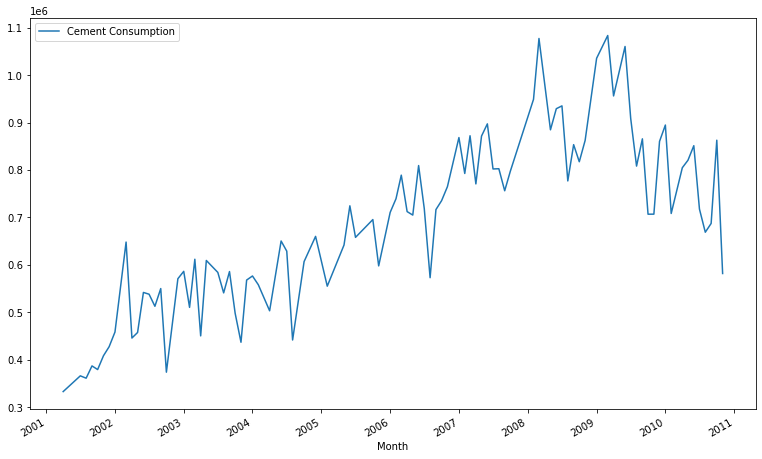

In [47]:
x_train.plot(figsize=(13,8))

<AxesSubplot:xlabel='Month'>

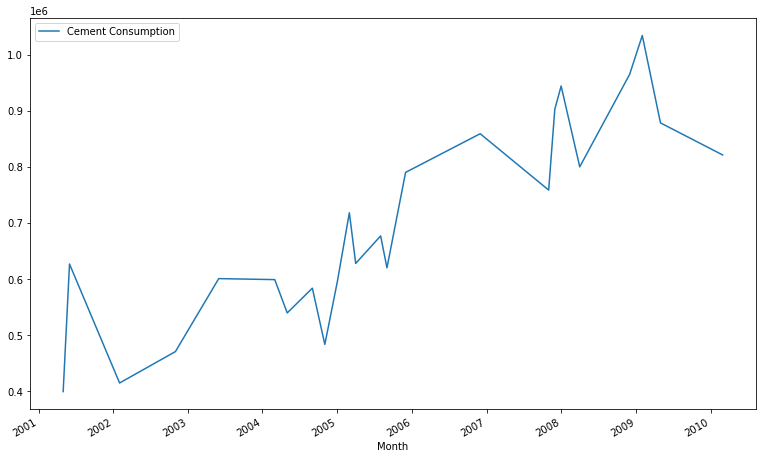

In [73]:
x_test.plot(figsize=(13,8))

# Generating Time Series geneartor

In [48]:
# Time Series Geneartor
from keras.preprocessing.sequence import TimeseriesGenerator

In [49]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()

In [50]:
train_scaled= scale.fit_transform(x_train)

In [51]:
train_scaled[:12]

array([[0.27841798],
       [0.39441092],
       [0.4229069 ],
       [0.51415533],
       [0.49818426],
       [0.62870714],
       [0.04421242],
       [0.62521697],
       [0.61256676],
       [0.74857687],
       [1.        ],
       [0.8023826 ]])

In [52]:
test_scaled= scale.fit_transform(x_test)

In [53]:
# We will take 12 values to predict 13th values

n_input = 12
generator = TimeseriesGenerator(train_scaled,train_scaled, length= n_input, batch_size=1)

In [54]:
generator[0]

(array([[[0.27841798],
         [0.39441092],
         [0.4229069 ],
         [0.51415533],
         [0.49818426],
         [0.62870714],
         [0.04421242],
         [0.62521697],
         [0.61256676],
         [0.74857687],
         [1.        ],
         [0.8023826 ]]]),
 array([[0.44755675]]))

In [55]:
len(generator)

80

# Building RNN

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialise RNN

In [57]:
rnn = Sequential()

# Adding the input and hidden layers

In [58]:
rnn.add(LSTM(units=100,activation='relu',input_shape=(n_input,1))) # 12 values as input to predict 1 value

# Output Layer

In [59]:
rnn.add(Dense(units=1))

In [60]:
dir(tf.keras.metrics)

['AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'BinaryIoU',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'IoU',
 'KLD',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanMetricWrapper',
 'MeanRelativeError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'MeanTensor',
 'Metric',
 'OneHotIoU',
 'OneHotMeanIoU',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '

# Compile RNN

In [61]:
rnn.compile(optimizer='adam',loss='mse',metrics='MAPE')

In [62]:
#fitting and run the model
rnn.fit(generator, epochs= 15)

Epoch 1/15
80/80 [==============================] - 4s 6ms/step - loss: 0.0973 - MAPE: 4463619.0000
Epoch 2/15
80/80 [==============================] - 0s 4ms/step - loss: 0.0567 - MAPE: 4928755.5000
Epoch 3/15
80/80 [==============================] - 0s 4ms/step - loss: 0.0586 - MAPE: 4314663.0000
Epoch 4/15
80/80 [==============================] - 0s 4ms/step - loss: 0.0631 - MAPE: 4407257.0000
Epoch 5/15
80/80 [==============================] - 0s 4ms/step - loss: 0.0602 - MAPE: 5650786.5000
Epoch 6/15
80/80 [==============================] - 0s 4ms/step - loss: 0.0606 - MAPE: 5102648.5000
Epoch 7/15
80/80 [==============================] - 0s 4ms/step - loss: 0.0566 - MAPE: 5668784.5000
Epoch 8/15
80/80 [==============================] - 0s 4ms/step - loss: 0.0573 - MAPE: 5259925.5000
Epoch 9/15
80/80 [==============================] - 0s 4ms/step - loss: 0.0610 - MAPE: 5610146.0000
Epoch 10/15
80/80 [==============================] - 0s 4ms/step - loss: 0.0570 - MAPE: 4964507.0000

In [63]:
#Last 12 train values
train_predict=train_scaled[-12:]

In [64]:
train_predict

array([[0.14489019],
       [0.        ],
       [0.71759458],
       [0.12606218],
       [0.33709369],
       [0.93607437],
       [0.69348999],
       [0.27721549],
       [0.31985213],
       [0.27348535],
       [0.63329049],
       [0.16722437]])

In [65]:
train_predict.shape

(12, 1)

# RNN always takes a 3D data

In [66]:
train_predict = train_predict.reshape(1,n_input,1)

In [67]:
train_predict.shape

(1, 12, 1)

In [68]:
rnn.predict(train_predict)

1/1 [==============================] - 0s 372ms/step


array([[0.4059997]], dtype=float32)

In [69]:
test_scaled[0]

array([0.308186])

In [70]:
#future Predictions

test_predictions = []

first_eval_batch = train_scaled[-n_input:] # -n input because the last 12 input are required for this case
current_batch = first_eval_batch.reshape((1,n_input,1))

for i in range(len(test_data)):
    
    # get the prediction value for the first batch
    current_pred = rnn.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred)
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis= 1) # 3 colons means 3 axis for 3d Data

1/1 [==============================] - 0s 17ms/step


In [71]:
test_predictions

[array([0.4059997], dtype=float32),
 array([0.40851054], dtype=float32),
 array([0.40975583], dtype=float32),
 array([0.40689713], dtype=float32),
 array([0.40822604], dtype=float32),
 array([0.40838146], dtype=float32),
 array([0.40382293], dtype=float32),
 array([0.4017905], dtype=float32),
 array([0.40302223], dtype=float32),
 array([0.40369266], dtype=float32),
 array([0.40454456], dtype=float32),
 array([0.40264946], dtype=float32),
 array([0.40415534], dtype=float32),
 array([0.404128], dtype=float32),
 array([0.40408346], dtype=float32),
 array([0.40403527], dtype=float32),
 array([0.4040101], dtype=float32),
 array([0.4039776], dtype=float32),
 array([0.4039482], dtype=float32),
 array([0.40395486], dtype=float32),
 array([0.40397435], dtype=float32),
 array([0.40398297], dtype=float32),
 array([0.40398613], dtype=float32),
 array([0.40398332], dtype=float32),
 array([0.40399393], dtype=float32),
 array([0.40399292], dtype=float32),
 array([0.40399206], dtype=float32),
 array([

In [72]:
scale.inverse_transform(test_predictions)

array([[657099.90731084],
       [658694.50521672],
       [659485.3689971 ],
       [657669.85540271],
       [658513.82828367],
       [658612.53247452],
       [655717.4808296 ],
       [654426.71770334],
       [655208.96970868],
       [655634.75100827],
       [656175.77867758],
       [654972.23106647],
       [655928.59234345],
       [655911.21737754],
       [655882.94047225],
       [655852.33554864],
       [655836.34225214],
       [655815.71184599],
       [655797.0309186 ],
       [655801.2705617 ],
       [655813.64880538],
       [655819.11870205],
       [655821.12496173],
       [655819.34582579],
       [655826.08383   ],
       [655825.44031274],
       [655824.89143038],
       [655824.66430664],
       [655824.66430664],
       [655824.74001455],
       [655825.00499225],
       [655825.38353181],
       [655825.62958252],
       [655825.78099835],
       [655825.87563324],
       [655825.93241417],
       [655826.06490302],
       [655826.10275698],
       [6558

# Conclusion : Time Series Forecasting using LSTM